In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

file_path = '/kaggle/input/prediction-of-asteroid-diameter/Asteroid.csv'
data = pd.read_csv(file_path)
data.head()



/kaggle/input/prediction-of-asteroid-diameter/Asteroid_Updated.csv
/kaggle/input/prediction-of-asteroid-diameter/Asteroid.csv


,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [ ]:
#the orbital period of asteroids (per year) will be predicted in this model.

In [2]:
#Data Preprocessing
missing_value_count_by_column = (data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column > 0])

a                      2
G                 839617
ad                     6
per_y                  1
data_arc           15789
condition_code       993
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64


In [ ]:
'''It can be observed that the columns G, diameter,extent,albedo,rot_per,
GM,BV,UB,IR, spec_B, spec_T wont be any help to the model training process
those columns can be dropped initially.

Next data_arc, pha, moid columns could be of use if used imputation

also codition_code, H and

lastly least data missing columns a, ad, neo also the same method'''

In [3]:
#drop unusable columns
columns_to_drop = ['G','diameter','extent','albedo','rot_per','GM','BV','UB','IR','spec_B','spec_T']
data.drop(columns=columns_to_drop, inplace=True)
print(data.head())

        full_name         a         e          i          om           w  \
0         1 Ceres  2.769165  0.076009  10.594067   80.305532   73.597694   
1        2 Pallas  2.772466  0.230337  34.836234  173.080063  310.048857   
2          3 Juno  2.669150  0.256942  12.988919  169.852760  248.138626   
3         4 Vesta  2.361418  0.088721   7.141771  103.810804  150.728541   
4       5 Astraea  2.574249  0.191095   5.366988  141.576604  358.687608   

          q        ad     per_y  data_arc condition_code  n_obs_used     H  \
0  2.558684  2.979647  4.608202    8822.0              0        1002  3.34   
1  2.133865  3.411067  4.616444   72318.0              0        8490  4.13   
2  1.983332  3.354967  4.360814   72684.0              0        7104  5.33   
3  2.151909  2.570926  3.628837   24288.0              0        9325  3.20   
4  2.082324  3.066174  4.130323   63431.0              0        2861  6.85   

  neo pha     moid  
0   N   N  1.59478  
1   N   N  1.23324  
2   N   N  

In [4]:
#find categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


Categorical variables:
['full_name', 'condition_code', 'neo', 'pha']


In [5]:
#check to see the unique values
unique_count_neo = data['neo'].unique()
unique_count_pha = data['pha'].unique()
unique_count_codition_code = data['condition_code'].unique()
print(f"Unique count neo: {unique_count_neo}")
print(f"Unique count pha: {unique_count_pha}")
print(f"Unique count condition_code: {unique_count_codition_code}")
print(data['condition_code'].dtypes)

Unique count neo: ['N' 'Y' nan]
Unique count pha: ['N' 'Y' nan]
Unique count condition_code: [0 2 1 4 3 5 nan '0' '1' '2' '3' '4' '8' '9' '7' '6' '5' 'E' 9.0 7.0 6.0
 8.0 'D']
object


In [6]:
#the condition_code column contains multiple data types.
#this process will seperate the condition_code column into 2 columns according to dtype

string_count = data['condition_code'].dropna().apply(lambda x: isinstance(x, str)).sum()
numeric_count = data['condition_code'].dropna().apply(lambda x: isinstance(x, (int, float))).sum()
print(f"Number of Strings: {string_count}")
print(f"Number count: {numeric_count}")

data['condition_code_str'] = data['condition_code'].apply(lambda x: x if isinstance(x, str) else None)
data['condition_code_num'] = data['condition_code'].apply(lambda x: x if isinstance(x, (int,float)) else None)

columns_to_drop = ['condition_code', 'full_name']
data.drop(columns=columns_to_drop, inplace=True)

print(data.head())

Number of Strings: 248940
Number count: 589803
          a         e          i          om           w         q        ad  \
0  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684  2.979647   
1  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865  3.411067   
2  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332  3.354967   
3  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909  2.570926   
4  2.574249  0.191095   5.366988  141.576604  358.687608  2.082324  3.066174   

      per_y  data_arc  n_obs_used     H neo pha     moid condition_code_str  \
0  4.608202    8822.0        1002  3.34   N   N  1.59478               None   
1  4.616444   72318.0        8490  4.13   N   N  1.23324               None   
2  4.360814   72684.0        7104  5.33   N   N  1.03454               None   
3  3.628837   24288.0        9325  3.20   N   N  1.13948               None   
4  4.130323   63431.0        2861  6.85   N   N  1.09589               None  

In [7]:
#creating backup
backup_data = data.copy()

#oridinal encoding will be applied to 'neo' and 'pha' columns
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
columns_to_encode = ['neo', 'pha', 'condition_code_str', 'condition_code_num']
for col in columns_to_encode:
    data[col] = ordinal_encoder.fit_transform(data[col].values.reshape(-1,1))

print(data[columns_to_encode].head())
print(data.head())


   neo  pha  condition_code_str  condition_code_num
0  0.0  0.0                12.0                 0.0
1  0.0  0.0                12.0                 0.0
2  0.0  0.0                12.0                 0.0
3  0.0  0.0                12.0                 0.0
4  0.0  0.0                12.0                 0.0
          a         e          i          om           w         q        ad  \
0  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684  2.979647   
1  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865  3.411067   
2  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332  3.354967   
3  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909  2.570926   
4  2.574249  0.191095   5.366988  141.576604  358.687608  2.082324  3.066174   

      per_y  data_arc  n_obs_used     H  neo  pha     moid  \
0  4.608202    8822.0        1002  3.34  0.0  0.0  1.59478   
1  4.616444   72318.0        8490  4.13  0.0  0.0  1.23324   
2  4.360814   72684.0

In [8]:
#Now a secondary check to see missing values
missing_value_count_by_column = (data.isnull().sum())
print(missing_value_count_by_column[missing_value_count_by_column > 0])

a                          2
ad                         6
per_y                      1
data_arc               15789
H                       2694
neo                        6
pha                    16922
moid                   16922
condition_code_num    249933
dtype: int64


In [9]:
#applying imputation for columns
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
columns_with_missing_values = ['a', 'ad', 'per_y', 'data_arc', 'H', 'moid', 'condition_code_num', 'neo', 'pha']
numeric_imputer = SimpleImputer(strategy='mean')

data[columns_with_missing_values]=numeric_imputer.fit_transform(data[columns_with_missing_values])

print(data.head())


          a         e          i          om           w         q        ad  \
0  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684  2.979647   
1  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865  3.411067   
2  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332  3.354967   
3  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909  2.570926   
4  2.574249  0.191095   5.366988  141.576604  358.687608  2.082324  3.066174   

      per_y  data_arc  n_obs_used     H  neo  pha     moid  \
0  4.608202    8822.0        1002  3.34  0.0  0.0  1.59478   
1  4.616444   72318.0        8490  4.13  0.0  0.0  1.23324   
2  4.360814   72684.0        7104  5.33  0.0  0.0  1.03454   
3  3.628837   24288.0        9325  3.20  0.0  0.0  1.13948   
4  4.130323   63431.0        2861  6.85  0.0  0.0  1.09589   

   condition_code_str  condition_code_num  
0                12.0                 0.0  
1                12.0                 0.0  
2             

In [10]:
#final check for missing values
missing_values = data.isnull().sum()
print(missing_values)

a                     0
e                     0
i                     0
om                    0
w                     0
q                     0
ad                    0
per_y                 0
data_arc              0
n_obs_used            0
H                     0
neo                   0
pha                   0
moid                  0
condition_code_str    0
condition_code_num    0
dtype: int64


In [12]:
#split the dataset into training set and validation set.
from sklearn.model_selection import train_test_split

#define the target variable
y = data['per_y']
X = data.drop(columns=['per_y'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X_train, y_train)

# Create a DataFrame to store the results for easy viewing
mi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual Information': mi
})

# Sort features by mutual information in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Display the mutual information values for each feature
print(mi_df)

               Feature  Mutual Information
0                    a           11.271149
6                   ad            0.948792
7             data_arc            0.832549
5                    q            0.824669
12                moid            0.817344
9                    H            0.301394
2                    i            0.261554
1                    e            0.110289
10                 neo            0.065637
13  condition_code_str            0.035852
14  condition_code_num            0.029909
8           n_obs_used            0.028734
11                 pha            0.005404
4                    w            0.002717
3                   om            0.001927


<ipython-input-15-2ad265ac275b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


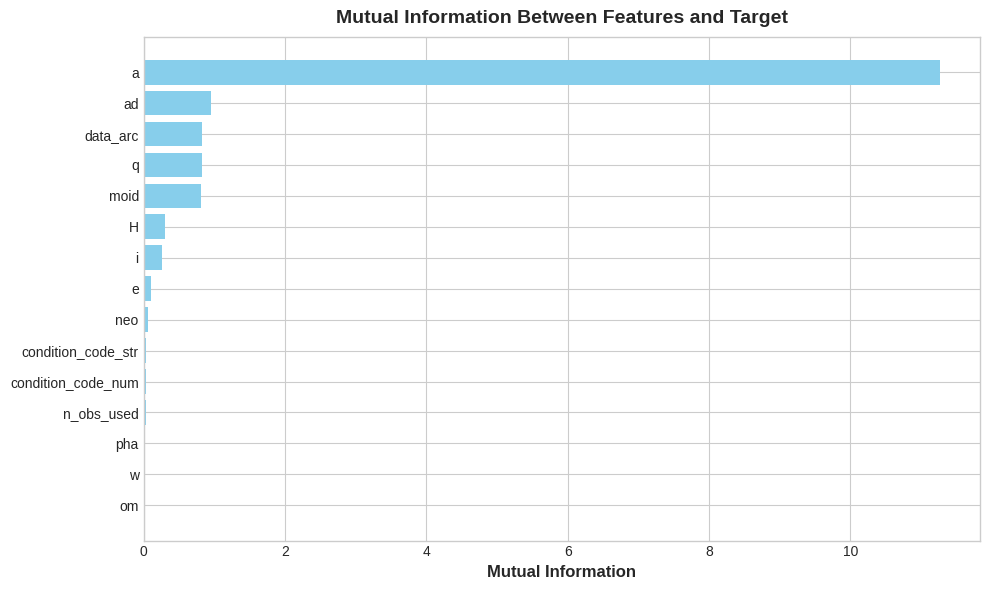

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Plot the mutual information for each feature
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Mutual Information')
plt.title('Mutual Information Between Features and Target')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest values at the top
plt.show()

In [17]:
# Select the relevant features (inputs) and the target variable
X_train_selected = X_train[['a', 'ad', 'data_arc', 'q', 'moid']]
X_valid_selected = X_valid[['a', 'ad', 'data_arc', 'q', 'moid']]


In [18]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform on the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train_selected)
X_valid_scaled = scaler.transform(X_valid_selected)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Select only 'A' as the input feature
X_train_a = X_train_selected
X_valid_a = X_valid_selected

# Step 2: Optional - Scale the feature
scaler = StandardScaler()
X_train_a_scaled = scaler.fit_transform(X_train_a)
X_valid_a_scaled = scaler.transform(X_valid_a)

# Step 3: Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)  # You can tune the number of trees (n_estimators)
rf_model.fit(X_train_a_scaled, y_train)

# Step 4: Make predictions
y_pred_rf = rf_model.predict(X_valid_a_scaled)

# Step 5: Evaluate the model
mse_rf = mean_squared_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)

print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - R² Score: {r2_rf}")

# Optional: Feature importance (to see how 'A' contributes to the model)
print("Feature Importances: ", rf_model.feature_importances_)

Random Forest Regression - Mean Squared Error: 34.323770564723
Random Forest Regression - R² Score: 0.991619243286325
Feature Importances:  [0.51837609 0.47346348 0.00334849 0.00219812 0.00261382]


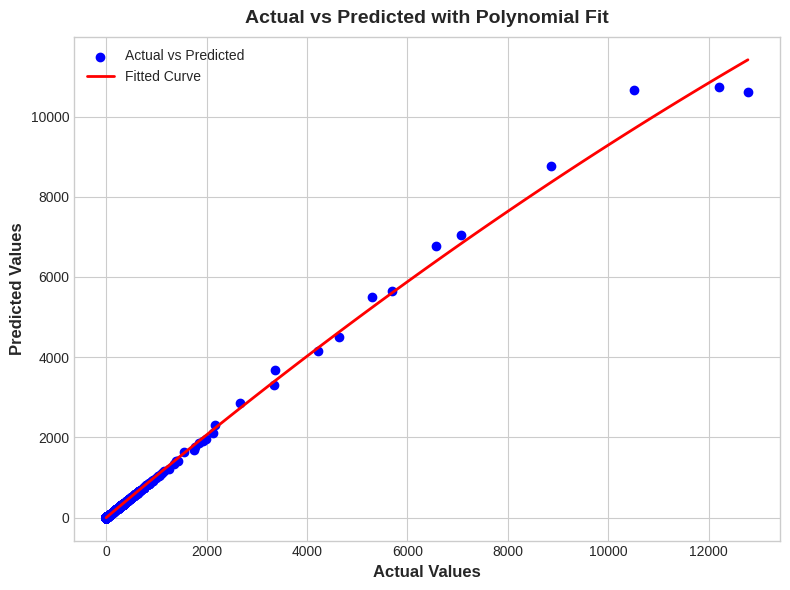

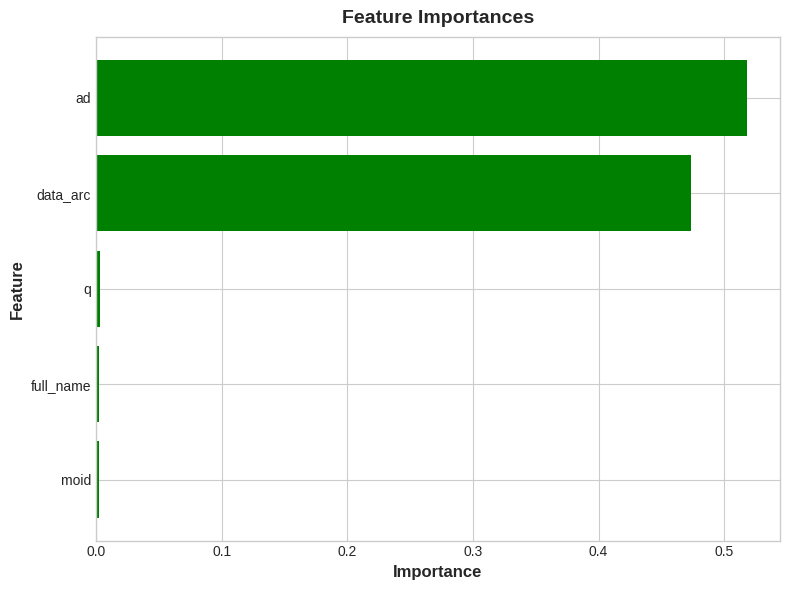

In [25]:
import numpy as np
# Fit a polynomial of degree 2 (quadratic) to the data
coeffs = np.polyfit(y_valid, y_pred_rf, 2)  # Change 2 to a higher degree for a more flexible curve
poly_eq = np.poly1d(coeffs)

# Create points to plot the curve
x_vals = np.linspace(y_valid.min(), y_valid.max(), 100)
y_vals = poly_eq(x_vals)

# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred_rf, color='blue', label='Actual vs Predicted')

# Plot the polynomial fit curve
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Fitted Curve')
plt.title('Actual vs Predicted with Polynomial Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

# Feature Importance Plot
features = ['ad', 'data_arc', 'q', 'moid', 'full_name']  # Replace this list with the actual feature names
importances = [0.5184, 0.4735, 0.0033, 0.0022, 0.0026]  # Use the actual feature importances from the model
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(np.array(features)[indices], np.array(importances)[indices], color='green')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()
